# Exam 2025 august problem 1

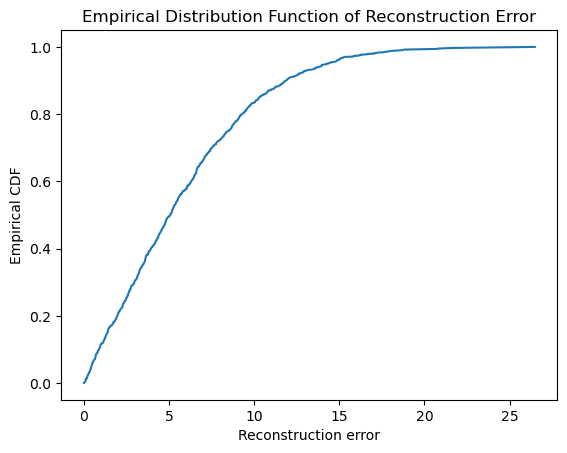

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load your data when available

'''
1. [4p] Load the file data/SVD.csv as instructed in the code cell. Compute the Singular Value
Decomposition, i.e. construct the three matrices U, D, V such that if X is the data matrix
of shape n_samples x n_dimensions then X = UDV T
. Put the resulting matrices in their
variables, check that the shapes align with the instructions in the code cell. Finally, extract
the first right and left singular vectors and store those as 1-d arrays in the instructed variables.
Hint: make sure that the first right and left singular vectors are correct by using
the matrix, also be careful about the shape!!
2. [3p] The first goal is to calculate the explained variance, check the lecture notes for definition.
Calculate the explained variance of using 1, 2,. . . number of singular vectors and select the
smallest number of singular vectors that is needed in order to explain at least 90% of the
variance.
3. [3p] With the number of components chosen in part 2, construct the best approximating
matrix with the rank as the number of components. Explain geometrically what each row
represents in the approximating matrix in terms of the original data, write your answer as
free text in the Markdown cell below as instructed in the cells.
4. [4p] Create a vector which corresponds to the row-wise (Euclidean) distance between the
original matrix problem1_dataand the approximating matrix problem1_approximation and
plot the empirical distribution function of that distance. Based on the empirical distribution
function choose a threshold such that 10 samples are above it and the rest below. Store the
10 samples in the instructed variable
'''




# Part 1: 4 points
# Load the data from the file data/SVD.csv and store the data in a numpy array called problem1_data below
# Double check that the numbers have been parsed correctly by checking the dtype of the array by calling problem1_data.dtype


df = np.array(pd.read_csv("data/SVD.csv"))



problem1_data = df # A numpy array of shape n_samples x n_dimensions


U, D, VT = np.linalg.svd(problem1_data, full_matrices=False)

problem1_U = U # The matrix of left singular vectors of problem1_data with shape n_samples x n_dimensions
problem1_D = D # The vector of singular values of problem1_data with shape →n_dimensions
problem1_V = VT.T # The matrix of right singular vectors of problem1_data with shape n_dimensions x n_dimensions


problem1_first_right_singular_vector = problem1_V[:, 0]
problem1_first_left_singular_vector  = problem1_U[:, 0]


# Part 2: 3 points
# Calculate the explained variance of using 1,2,3,...,n_dimensions singular values and store it as a numpy array called problem1_explained_variance below

singular_values_squared = problem1_D**2

problem1_explained_variance = np.cumsum(singular_values_squared) / np.sum(singular_values_squared) # A numpy array of shape (n_dimensions,), it should be an increasing sequence of positive numbers and the last element should be 1



# Store in the variable below the smallest number of singular values needed to explain at least 90% of the variance


problem1_num_components = np.argmax(problem1_explained_variance >= 0.9) + 1 # An integer



# Part 3: 3 points
# Calculate the approximating matrix of problem1_data using the first problem1_num_components singular values and store it in the variable below
k = problem1_num_components

Uk = problem1_U[:, :k]
Dk = np.diag(problem1_D[:k])
Vk = problem1_V[:, :k]


problem1_approximation = Uk @ Dk @ Vk.T # A numpy array of shape n_samples x n_dimensions

# Part 4: 4 points
# Calculate the reconstruction error of problem1_data using problem1_approximation and store it in the variable below (should have shape
# (n_samples,)) (row wise Euclidean distance)
problem1_reconstruction_error = np.linalg.norm(
    problem1_data - problem1_approximation,
    axis=1
)


# Put the code below to plot the empirical distribution function of the

sorted_errors = np.sort(problem1_reconstruction_error)
n = len(sorted_errors)
edf = np.arange(1, n+1) / n

plt.plot(sorted_errors, edf)
plt.xlabel("Reconstruction error")
plt.ylabel("Empirical CDF")
plt.title("Empirical Distribution Function of Reconstruction Error")
plt.show()

# Store the value of the selected threshold in the variable below
sorted_desc = np.sort(problem1_reconstruction_error)[::-1]
problem1_threshold = sorted_desc[10]


# Finally store the samples of problem1_data that have a reconstruction error larger than problem1_threshold in the variable below, should have shape 
# (10, n_dimensions)

mask = problem1_reconstruction_error > problem1_threshold
problem1_outliers = problem1_data[mask]

## free text answer
Each row of the approximating matrix represents the projection of the original data point onto the subspace spanned by the first problem1_num_components right singular vectors. Geometrically, this means that every original data vector in ℝⁿ is replaced by its closest point in a lower-dimensional linear subspace that captures at least 90% of the total variance. The rows therefore describe denoised, compressed versions of the original observations, preserving the main structure while discarding directions with small variance

## problem 2


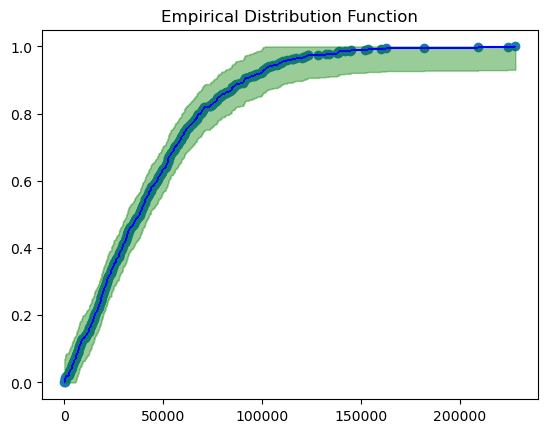

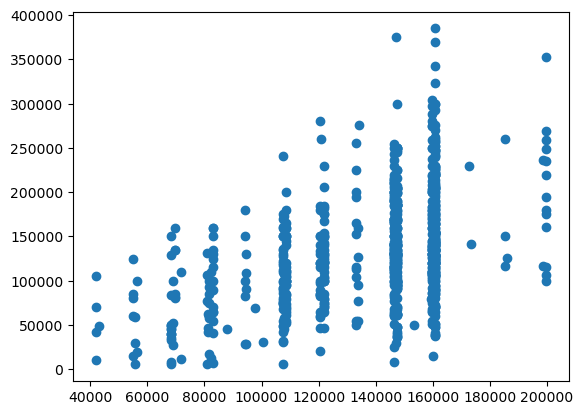

135627.99201065247 3947789835.4406824
137570.38988015978 3974953021.204049


In [23]:
'''
You are given the data-science job salaries dataset found in data/salaries.csv, which contains
the salaries of jobs, their experience level and how much of the working hours are remote. Your
task is to train a linear regression model to predict the salary of a job based on its attributes:
* work_year, The year the salary was paid. * experience_level, The experience level in the job
during the year with the following possible values: 0 Entry-level / Junior 1 Mid-level / Intermediate
2 Senior-level / Expert 3 Executive-level * employment_type, The type of employement for the role:
Part-time, Full-time, Contract, Freelance * salary_in_usd, The total gross salary amount paid in
US Dollars. * remote_ratio, The overall amount of work done remotely, possible values are as
follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)
To evaluate your model, you will split the dataset into a training set and a testing set. You will use
the training set to train your model, and the testing set to evaluate its performance.
1. Load the data into a pandas dataframe problem2_df. Based on the column names, figure out
what are the features and the target and fill in the answer in the correct cell below. [2p]
2. Split the data into train and test. [2p]
3. Train the model. [1p]
4. On the test set, evaluate the model by computing the mean absolute relative error and plot
the empirical distribution function of the residual with confidence bands (i.e. using the DKW
inequality and 99% confidence). Hint: you can use the function plotEDF,makeEDF combo
from Utils.py that we have used numerous times, which also contains the option to have
confidence bands. [3p]
Absolute relative error = abs(true-predict / true )

5. Provide a scatter plot where the x-axis corresponds to the predicted value and the y-axis is
the true value, do this over the test set. [2p]
6. Reason about the performance, for instance, is the value of the mean absolute relative error
good/bad and what do you think about the scatter plot in point 5? [3p]

'''
import pandas as pd 
from sklearn.model_selection import train_test_split
import sklearn
import Utils
import numpy as np
import matplotlib.pyplot as plt 



# Part 1
# Let problem2_df be the pandas dataframe that contains the data from the file data/salaries.csv
df = pd.read_csv("data/salaries.csv")
test = df.drop(columns=['salary_in_usd'])


problem2_df = df

# Part 1
# Fill in the features as a list of strings of the names of the columns
problem2_features = test
# Fill in the target as a string with the correct column name
problem2_target = df['salary_in_usd']

# Part 2
# Split the data into train and test using train_test_split
# keep the train size as 0.8 and use random_state=42


problem2_X_train,problem2_X_test,problem2_y_train,problem2_y_test = train_test_split(
    problem2_features, problem2_target,
    test_size=0.2,
    random_state=42
)


# Part 3
# Include the necessary imports
# Initialize your linear regression model
model = sklearn.linear_model.LinearRegression()
model.fit(problem2_X_train, problem2_y_train)


problem2_model = model
# Train your model on the training data


# Part 4
# Evaluate the model by computing the mean absolute relative error
y_pred = model.predict(problem2_X_test)
relative_error = np.mean(np.abs((problem2_y_test - y_pred) / problem2_y_test))

problem2_mare = relative_error

# Part 4
# Write the code to plot the empirical distribution function of the residual
# with confidence bands with 99% confidence in this cell
edf = Utils.makeEDF(abs(problem2_y_test - y_pred))
Utils.plotEDF(edf, confidence_band = True, alpha = 0.99)

# Part 5
# Write the code below to produce the scatter plot for part 5
plt.scatter(y_pred, problem2_y_test)
plt.show()
print(np.mean(problem2_y_test), np.var(problem2_y_test))
print(np.mean(problem2_target), np.var(problem2_target))


## problem 3